# Constructing Stacking Model

## CTGAN Model Comparisons
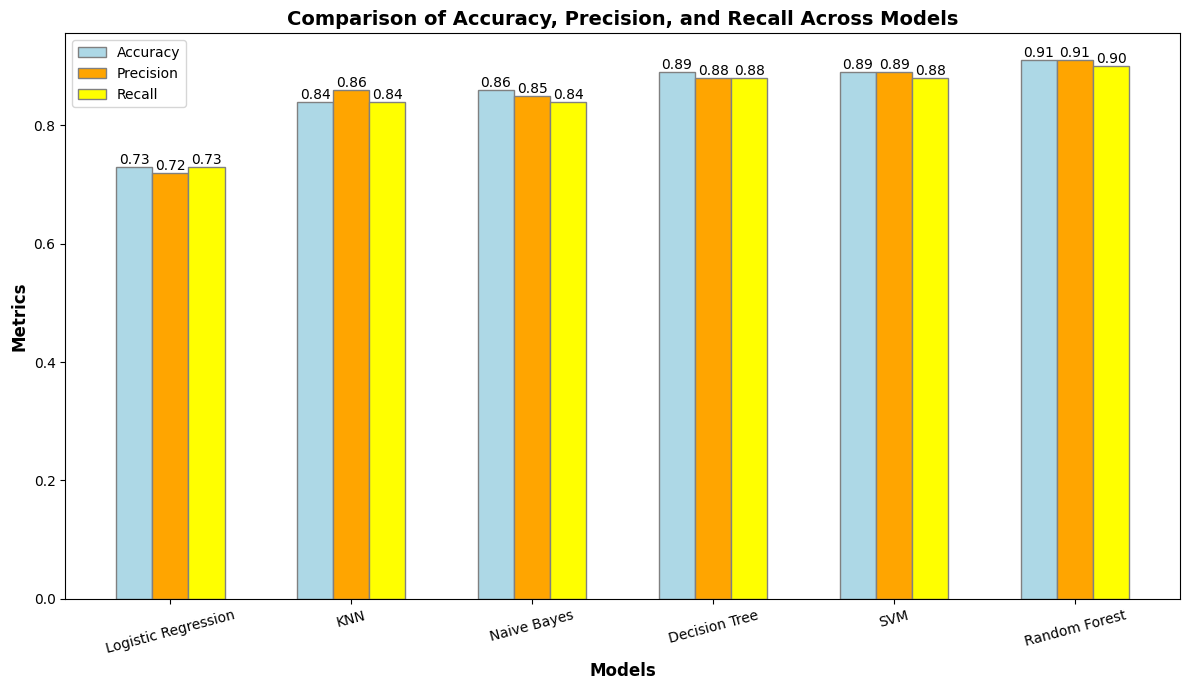

## SMOTE Model Comparisons
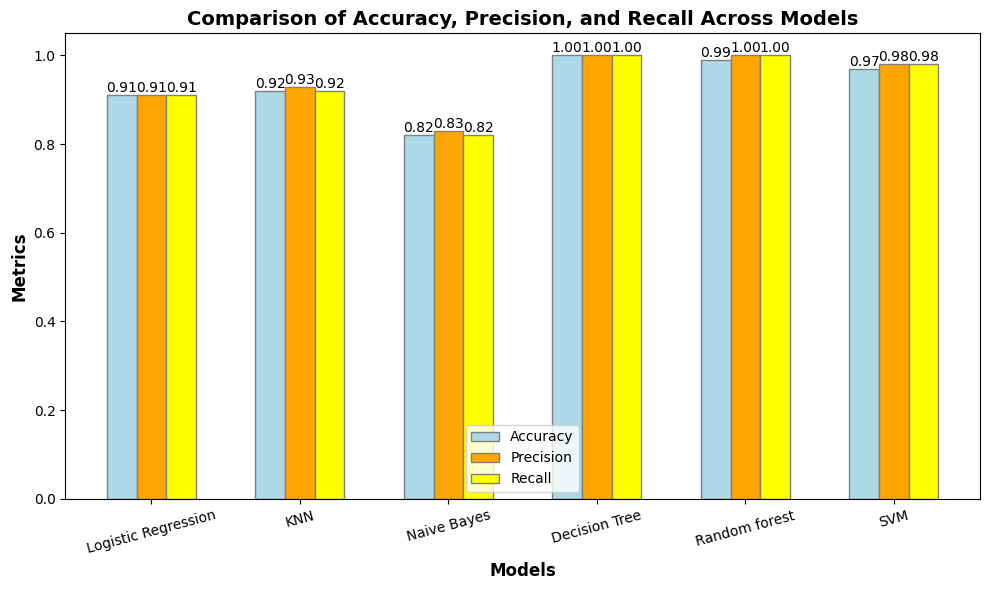


## Stacking Model

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score,  classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ctgan_dtree = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/dtree_ctgan.pkl')
ctgan_svm = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/svm_ctgan.pkl')
ctgan_rf = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/random_forest_ctgan.pkl')
smote_svm = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/SMOTE/svm_model.pkl')
smote_log_reg = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/SMOTE/logistic_regression_model.pkl')
smote_knn = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/SMOTE/knn_classifier.pkl')
smote_rf = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/SMOTE/random_forest_model.pkl')

In [ ]:
base_models = [
    ('ctgan_dtree', ctgan_dtree),
    ('ctgan_svm', ctgan_svm),
    ('ctgan_rf', ctgan_rf),
    ('smote_log_reg', smote_log_reg),
    ('smote_knn', smote_knn),
    ('smote_rf', smote_rf)
]

In [ ]:
stacking_model = StackingClassifier(
    estimators = base_models,
    final_estimator = smote_svm
)

## Aggregating Train and Test Datasets

In [13]:
X_smote = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/X_smote.csv')
X_ctgan = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/X_ctgan.csv')
y_smote = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/SMOTE_AugmentedDataset/y_smote.csv')
y_ctgan = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/y_ctgan.csv')

In [14]:
X_aggreggated = pd.concat([X_smote, X_ctgan], axis=0)
y_aggreggated = pd.concat([y_smote, y_ctgan], axis=0)

In [15]:
print(X_aggreggated.shape, y_aggreggated.shape)

(134687, 6) (134687, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_aggreggated, y_aggreggated, test_size=0.3, random_state=42)

In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(94280, 6) (94280, 1) (40407, 6) (40407, 1)


In [18]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
67118,2,1.478954,0.856770,7.329679,2.572212,1.879918
44481,1,0.940757,0.552554,-0.703532,0.540389,1.567853
44582,3,0.453652,-0.192548,-2.007828,1.143556,0.684782
26336,1,-0.388408,1.114058,2.251596,0.263289,0.034359
31575,1,2.818407,-0.617994,-1.011886,1.079272,1.495657


In [19]:
y_train.head()

,Reason of Failure
67118,2
44481,6
44582,1
26336,2
31575,4


In [20]:
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
56385,1,1.062279,0.667099,-0.973686,0.360141,0.846614
84865,1,1.032891,0.317863,-1.988576,2.819025,0.725259
71158,1,0.323515,-0.921097,-1.135618,2.283662,1.606298
70281,1,0.162990,0.179524,-1.962717,1.675645,1.355641
50470,1,-0.576949,-0.641358,-0.399764,-1.897754,1.643369


In [21]:
y_test.head()

,Reason of Failure
56385,3
84865,1
71158,4
70281,4
50470,6


## Training

In [ ]:
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('ctgan_dtree',
                                DecisionTreeClassifier(max_depth=15,
                                                       min_samples_leaf=4,
                                                       random_state=42)),
                               ('ctgan_svm', SVC(probability=True)),
                               ('ctgan_rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('smote_log_reg', LogisticRegression()),
                               ('smote_knn',
                                KNeighborsClassifier(n_neighbors=181)),
                               ('smote_rf',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=SVC(probability=True))

In [ ]:
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)

## Evaluation on Aggregated Test Data

In [ ]:
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4035
           1       0.99      1.00      1.00      6007
           2       0.96      0.92      0.94      6092
           3       0.91      0.94      0.92      5988
           4       0.93      0.96      0.95      6116
           5       0.95      0.90      0.92      6044
           6       0.95      0.95      0.95      6125

    accuracy                           0.95     40407
   macro avg       0.95      0.95      0.95     40407
weighted avg       0.95      0.95      0.95     40407



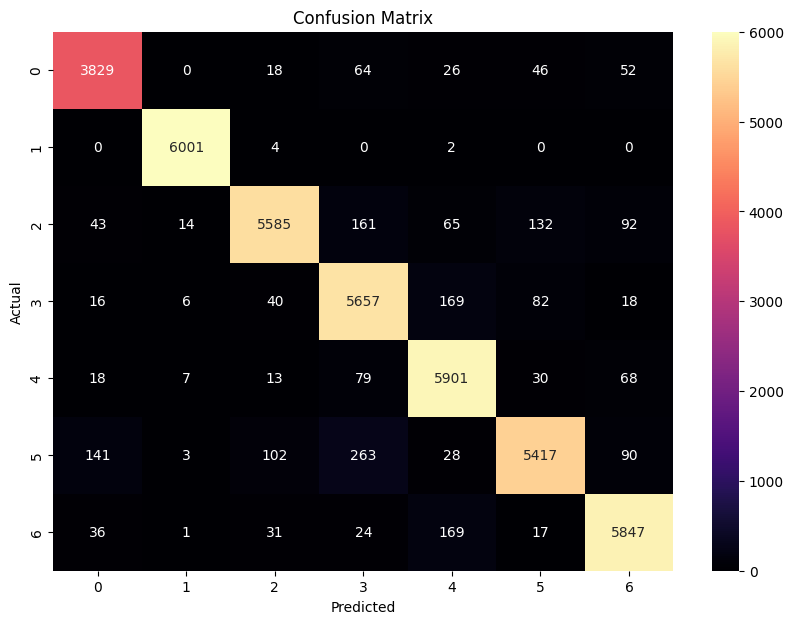

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

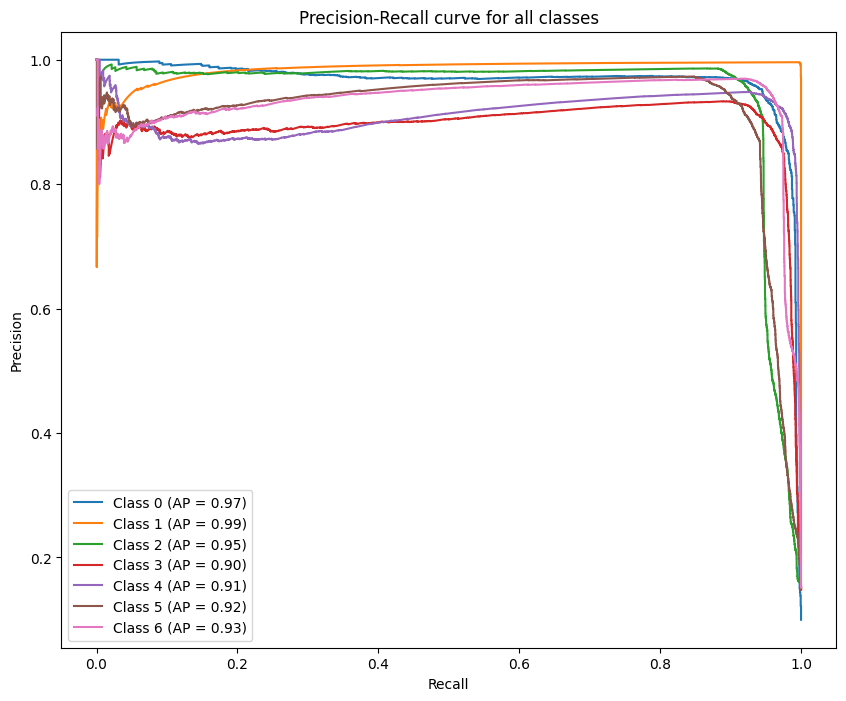

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(stacking_model, '/content/drive/MyDrive/PredictiveMaintenance/Models/stacking_model.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/stacking_model.pkl']

## Prediction on Single Data Point

In [3]:
stacking_classifier = joblib.load('/content/drive/MyDrive/PredictiveMaintenance/Models/stacking_model.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.0 when using version 1.6.1. This might lead to breaking cod

In [23]:
means = X_train.mean(axis=0).values
std_devs = X_train.std(axis=0).values

In [25]:
stats_array = np.array([means, std_devs])
stats_array

array([[ 1.37100127,  0.57756251,  0.29732355, -0.60200846,  0.91186925,
         0.58357926],
       [ 0.67149654,  1.04911211,  1.08637059,  1.74040374,  1.64897852,
         1.12454442]])

In [58]:
single_data_point = {
    "Type": 2,
    "Air temperature [K]": 400,
    "Process temperature [K]": 309.1,
    "Rotational speed [rpm]": 5000,
    "Torque [Nm]": 46,
    "Tool wear [min]": 143,
}

In [59]:
single_input = pd.DataFrame([single_data_point])

In [60]:
normalized_input = (single_input - means) / std_devs
normalized_input

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.936712,380.724265,284.25169,2873.242508,27.343067,126.64366


In [61]:
prediction = stacking_classifier.predict(normalized_input)
prediction

array([2])